G = [ g(x1-t1) g(x1-t2) ... g(x1-tN)
      g(x2-t1) g(x2-t2) ... g(x2-tN)
      ...
      g(xM-t1) g(xM-t2) ... g(xM-tN)]

more information for code

In [4]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.9 MB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 140.0 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 112.4 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 145.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

def gaussian_kernel_1d(x, xi, sigma):
    return np.exp(-((x - xi) ** 2) / (2 * sigma ** 2))

def construct_G_matrix(xi_values, t_values, sigma):
    M = len(xi_values)
    N = len(t_values)
    G = np.zeros((M, N)) 

    for i, xi in enumerate(xi_values):
        for j, tj in enumerate(t_values):
            G[i, j] = gaussian_kernel_1d(xi, tj, sigma)  # g(xi - tj)
    
    return G

def convolve_dot_product(image_2d, filter_size, sigma):
    """
    Seminar2024ーImage Processing　p.14, eq(2)
    filter_size: M, N
    `sigma` is standard deviation of Guassian function
    M is same value with N.
    """

    M = N = filter_size
    # Generate xi and t values
    xi_values = np.linspace(0, M, M)  # range of ξ_m
    t_values = np.linspace(0, N, N)  # range of t_n

    # Construct G, F, X matrix
    G = construct_G_matrix(xi_values, t_values, sigma)
    F = G.T
    Y1_2d = np.dot(np.dot(G, image_2d), F.T)
    Y1_1d = Y1_2d.flatten()
    return Y1_1d


def convolve_kronecker_product(image_2d, filter_size, sigma):
    """
    Seminar2024ーImage Processing　p.14, eq(2)
    filter_size: M, N
    `sigma` is standard deviation of Guassian function
    M is same value with N.
    """

    M = N = filter_size

    # Generate xi and t values
    xi_values = np.linspace(0, M, M)  # range of ξ_m
    t_values = np.linspace(0, N, N)  # range of t_n

    # Construct G, F, X matrix
    G = construct_G_matrix(xi_values, t_values, sigma)
    F = G.T
    vec_X = image_2d.flatten()
    Y2_1d = np.dot(np.kron(F, G), vec_X)
    return Y2_1d



In [31]:

# Checkerboard
# X = np.random.random((N, N)) 
X_checkerboard = data.checkerboard()

In [32]:
X_checkerboard = X_checkerboard[::2, ::2]
X_random = np.random.random((100, 100))

In [38]:
result_checkerboard = convolve_kronecker_product(X_checkerboard, 100, 4)
result_random = convolve_kronecker_product(X_random, 100, 4)

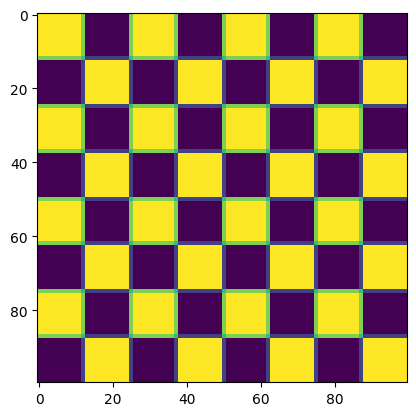

In [39]:
plt.imshow(X_checkerboard)
plt.show()

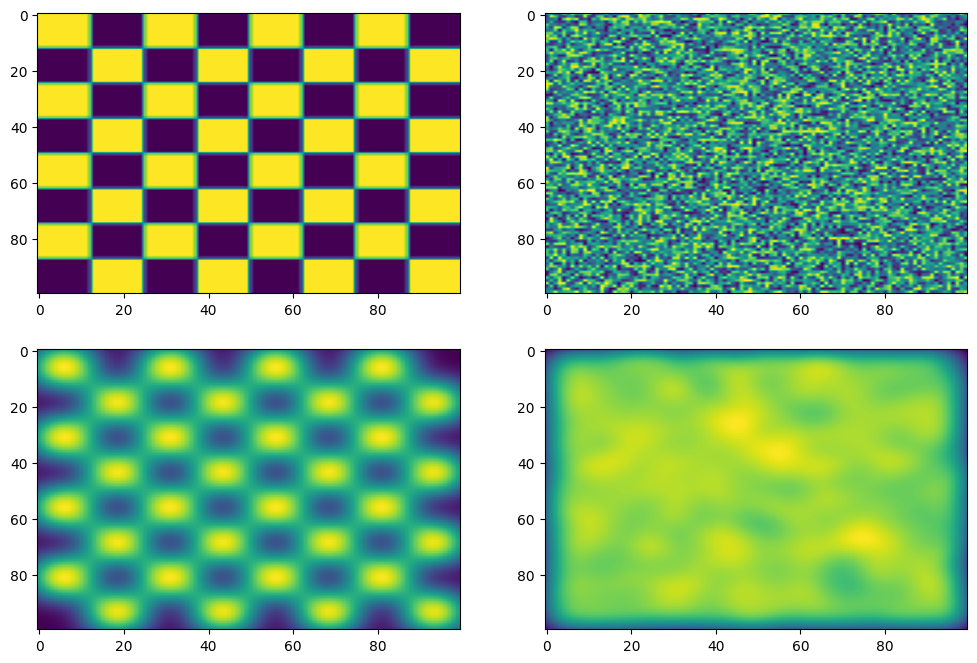

In [40]:
X_checkerboard_2d = X_checkerboard.reshape(100, 100)
X_random_2d = X_random.reshape(100, 100)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()

ax1.imshow(X_checkerboard_2d, cmap='viridis', aspect='auto')
ax2.imshow(X_random_2d, cmap='viridis', aspect='auto')
ax3.imshow(result_checkerboard.reshape(100, 100), cmap='viridis', aspect='auto')
ax4.imshow(result_random.reshape(100, 100), cmap='viridis', aspect='auto')

# plt.colorbar(label="g(ξi - tj)")
# plt.title("result")
# plt.xlabel("tj")
# plt.ylabel("ξi")
# plt.show()

plt.show()
